# Prelude
Now that I know that my Jupyter notebook will be submitted, I will try my best to organize my code hahahhaha. 

# Start of Code
First importng the needed libraries.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

N = 400  


As suggested by sir Rene, I will automate my code by putting all the processes in functions.

## What each of my functions do

##### ${\tt show\_fft}$:
> Takes in three arguements which are ${\tt limit}$, ${\tt R}$, and ${\tt title}$. <br>
> Creates an zero array of size $(400,400)$ and changes the value of its elements based on ${\tt limit}$ and ${\tt R}$ ,and outputs the graph of A and its 2D Fourier Transform. <br>
<br>
> Arguments <br>
> $\;\;\;\;$ ${\tt limit}$: Any values above ${\tt limit}$ are set to 1. <br>
> $\;\;\;\;$ ${\tt R}$: A function that serves as a "mask" for ${\tt A}$. For example, for any ${\tt R}$ value that is greater than  ${\tt limit}$, the corresponding value in ${\tt A}$ will be set to 1. <br>
> $\;\;\;\;$ ${\tt title}$: Serves as the title of the output graph


In [75]:
path = "./Images/"

def show_fft(limit, R, title):
    # Setting up grid and matrix                      
    A = np.zeros((N,N))

    # Making the image
    A[R < limit] = 1.0

    # Applying fft
    FA = np.fft.fft2(A)
    
    # Shifting 
    FAshifted = np.fft.fftshift(FA)
    
    # Plotting
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(A, cmap = "gray")
    ax[0].set_title(title)
    
    ax[1].imshow(abs(FAshifted), cmap = "hot")
    ax[1].set_title("Fourier Transformed Image")
    plt.tight_layout()
    plt.show()
    

# Outputs are here

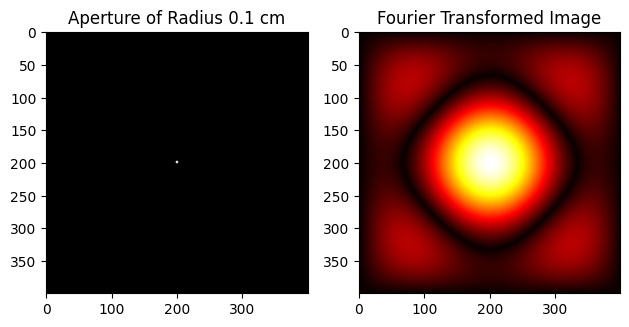

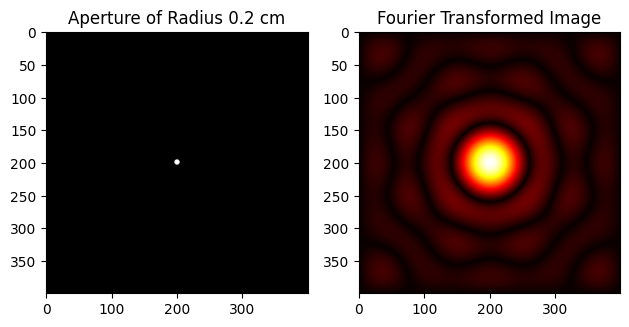

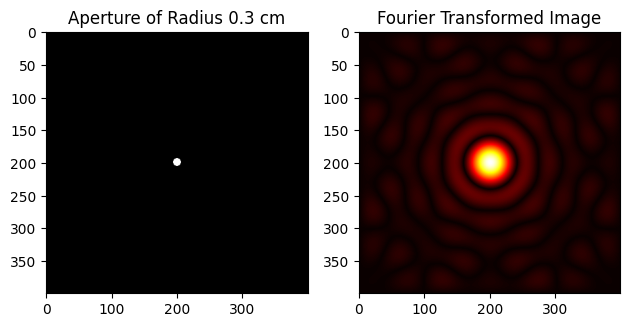

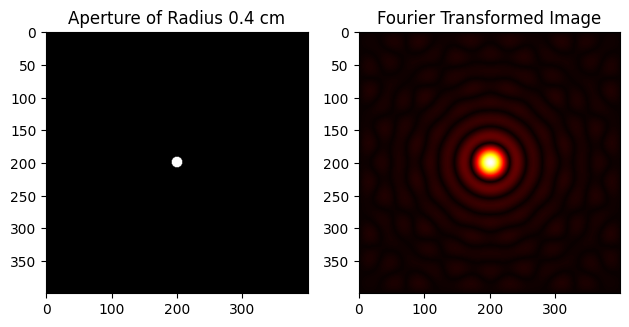

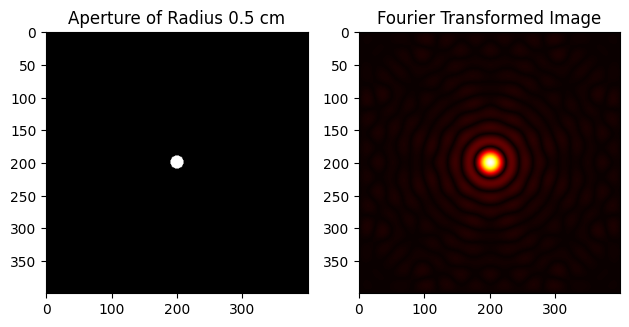

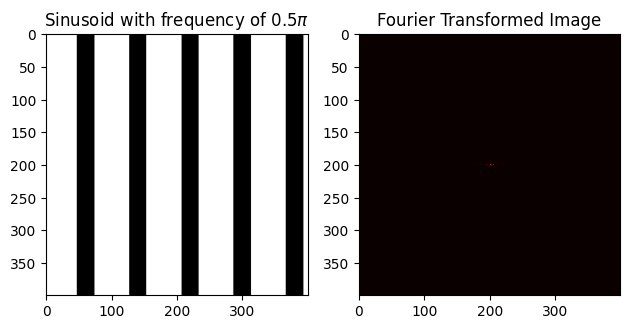

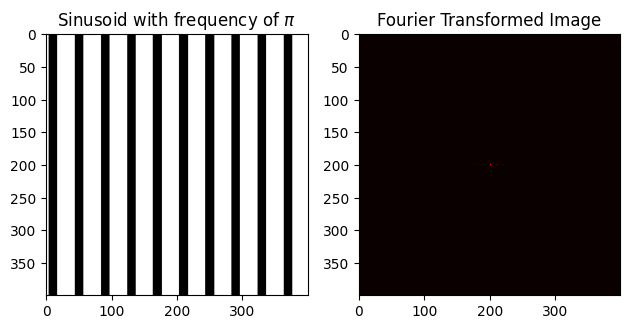

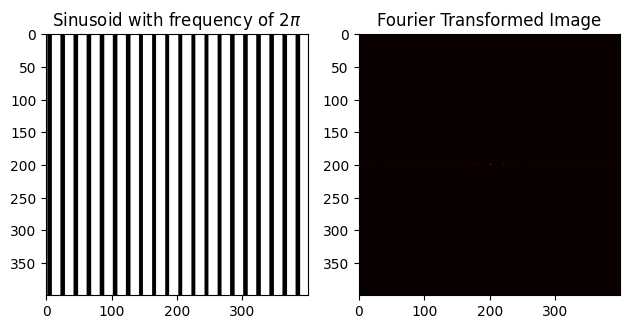

In [82]:
x = np.linspace(-10,10,num = N)
y = x
X,Y = np.meshgrid(x,y)
show_fft(0.1, np.sqrt(X**2 + Y**2), "Aperture of Radius 0.1 cm")
show_fft(0.2, np.sqrt(X**2 + Y**2), "Aperture of Radius 0.2 cm")
show_fft(0.3, np.sqrt(X**2 + Y**2), "Aperture of Radius 0.3 cm")
show_fft(0.4, np.sqrt(X**2 + Y**2), "Aperture of Radius 0.4 cm")
show_fft(0.5, np.sqrt(X**2 + Y**2), "Aperture of Radius 0.5 cm")
show_fft(0.5, np.sin(0.5*np.pi*X), "Sinusoid with frequency of $0.5\pi$")
show_fft(0.5, np.sin(1*np.pi*X), "Sinusoid with frequency of $\pi$")
show_fft(0.5, np.sin(2*np.pi*X), "Sinusoid with frequency of $2\pi$")